In [14]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Importing libraries

In [81]:
import praw
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import yfinance as yf
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## Importing data

In [2]:
df = pd.read_csv("/Users/ritushreedey/Documents/capXassignment/headlines.csv")
df.head()

,Text,date,time
0,Message For Christopher DeVocht : Post Your Lo...,2024-10-05,10:16:24
1,🍀💎🤑,2024-10-05,10:08:45
2,"Earnings for the coming week, 10/7~10/11/2024",2024-10-05,09:59:59
3,Carpenter claims he made $415 million on Tesla...,2024-10-05,08:47:32
4,Trump falsely touts endorsement from JP Morgan...,2024-10-05,08:44:09


## Pre-processing 'Text'

### Extracting only alphanumeric characters, removing rows with blank spaces and removing rows with word count less than 10.

In [3]:
df['Text'] = df['Text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df = df[df['Text'].str.strip() != '']

In [4]:
df['Text'] = df['Text'].replace(r'\s+', ' ', regex=True).str.strip()
df = df[df['Text'].str.strip() != '']

In [5]:
df['Text'] = df['Text'].replace(r'\s+', ' ', regex=True).str.strip()
df = df[df['Text'].str.split().str.len() >= 10]

In [6]:
df['Text'].values[234]

'How Can People Lose So Much Money with Stop Loss Orders'

## Sentiment Analysis

In [7]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)

df['sentiment_scores'] = df['Text'].apply(get_vader_sentiment)

In [8]:
df['positive'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])
df['negative'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])
df['compound'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [9]:
def get_vader_insight(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Insight'] = df['compound'].apply(get_vader_insight)
df.head(20)

,Text,time_posted,sentiment_scores,positive,negative,neutral,compound,Insight
3,5202250 realized gain 2 calls still left open ...,2024-10,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.195,0.000,0.805,0.5267,Positive
5,EU presses ahead with Chinese EV tariffs after...,2024-10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutral
7,Rolled the dice on SAVE When do I cut it,2024-10,"{'neg': 0.15, 'neu': 0.57, 'pos': 0.28, 'compo...",0.280,0.150,0.570,0.4278,Positive
9,US SEC and DOJ Backs Nvidia Investor Lawsuit o...,2024-10,"{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'comp...",0.000,0.404,0.596,-0.6249,Negative
10,Rivian makes a truck that can survive Armagedd...,2024-10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutral
24,88k to 415M to zero A true hero among men,2024-10,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.444,0.000,0.556,0.7506,Positive
28,Amazon could cut 14000 managers soon and save ...,2024-10,"{'neg': 0.105, 'neu': 0.65, 'pos': 0.245, 'com...",0.245,0.105,0.650,0.4215,Positive
30,first option trade i think this one is a lock ...,2024-10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutral
34,Spirit Airlines Talks with bondholders iver te...,2024-10,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.145,0.000,0.855,0.1779,Positive
36,Dockworkers International Longshoremans Associ...,2024-10,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",0.000,0.322,0.678,-0.4215,Negative


In [9]:
df = df.drop(columns=['sentiment_scores'])

In [11]:
df.head()

,Text,date,time,positive,negative,neutral,compound
3,Carpenter claims he made 415 million on Tesla ...,2024-10-05,08:47:32,0.000,0.173,0.827,-0.3182
4,Trump falsely touts endorsement from JP Morgan...,2024-10-05,08:44:09,0.374,0.085,0.541,0.5766
7,US CFTC seeks quick appeals hearing on electio...,2024-10-05,07:47:27,0.000,0.173,0.827,-0.3182
8,Googles NotebookLM Gets a Little Freaky on the...,2024-10-05,07:22:21,0.000,0.115,0.885,-0.2975
11,Oct 10 is the day of AI TSLA Robotaxi and AMD ...,2024-10-05,07:12:47,0.000,0.000,1.000,0.0000


## Extracting mentions of stocks

In [24]:
with open('all_tickers.txt', 'r') as txt_file:
    stock_list = [item.lower() for item in txt_file.read().splitlines()]

In [26]:
df['Text'] = df['Text'].str.lower()

In [27]:
def extract_stock_symbols(text, stock_list):
    return [symbol for symbol in stock_list if symbol in text]
df['Stock_Mention'] = df['Text'].apply(lambda text: extract_stock_symbols(text, stock_list))
df = df.explode('Stock_Mention')
df = df.dropna(subset=['Stock_Mention'])

df.head()


,Text,date,time,positive,negative,neutral,compound,Stock_Mention
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,a
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,ai
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,an
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,b
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,br


In [28]:
df = df[df['Stock_Mention'].str.len() > 1]
df['Stock_Mention'] = df['Stock_Mention'].str.upper()
df.head()

,Text,date,time,positive,negative,neutral,compound,Stock_Mention
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,AI
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,AN
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,BR
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,BRO
8,googles notebooklm gets a little freaky on the...,2024-10-05,07:22:21,0.0,0.115,0.885,-0.2975,COMP


## Sentiment analysis with respect to specific stocks

### NOTE: Selecting TSLA, NVDA, AMZN, AAPL, MSFT for further analysis.

In [45]:
stocks_of_interest = ['TSLA', 'NVDA', 'AMZN', 'AAPL', 'MSFT']
df_filtered = df[df['Stock_Mention'].isin(stocks_of_interest)]


In [46]:
mood_summary = df_filtered.groupby('Stock_Mention')[['positive', 'negative', 'neutral', 'compound']].mean()
print(mood_summary)


               positive  negative   neutral  compound
Stock_Mention                                        
AAPL           0.032667  0.017772  0.949561  0.059144
AMZN           0.052262  0.001545  0.946193  0.150734
MSFT           0.136012  0.010127  0.853862  0.420012
NVDA           0.035650  0.034717  0.929633  0.022806
TSLA           0.035689  0.002857  0.961455  0.102838


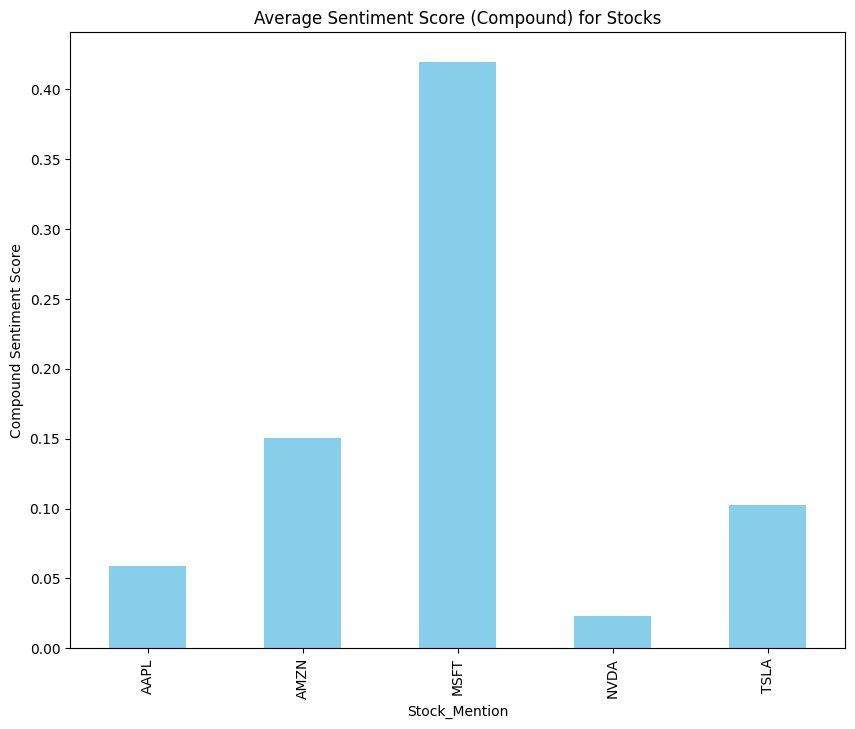

In [47]:
mood_summary['compound'].plot(kind='bar', title='Average Sentiment Score (Compound) for Stocks', color='skyblue')
plt.ylabel('Compound Sentiment Score')
plt.show()


In [48]:
stock_mentions_count = df_filtered['Stock_Mention'].value_counts()

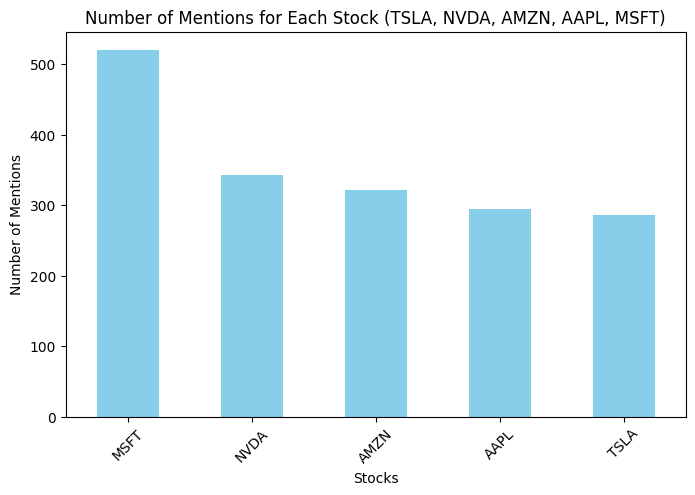

In [49]:
stock_mentions_count.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Number of Mentions for Each Stock (TSLA, NVDA, AMZN, AAPL, MSFT)')
plt.xlabel('Stocks')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)  
plt.show()

/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1224/849993738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


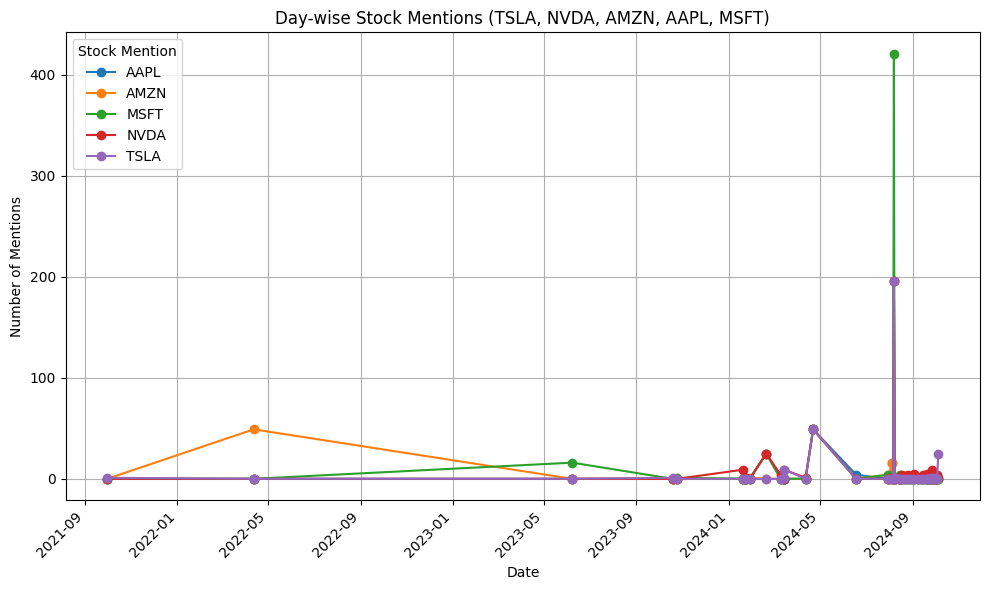

In [52]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
day_wise_mentions = df_filtered.groupby(['date', 'Stock_Mention']).size().unstack().fillna(0)
day_wise_mentions.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Day-wise Stock Mentions (TSLA, NVDA, AMZN, AAPL, MSFT)')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.legend(title='Stock Mention')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1224/1946071435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


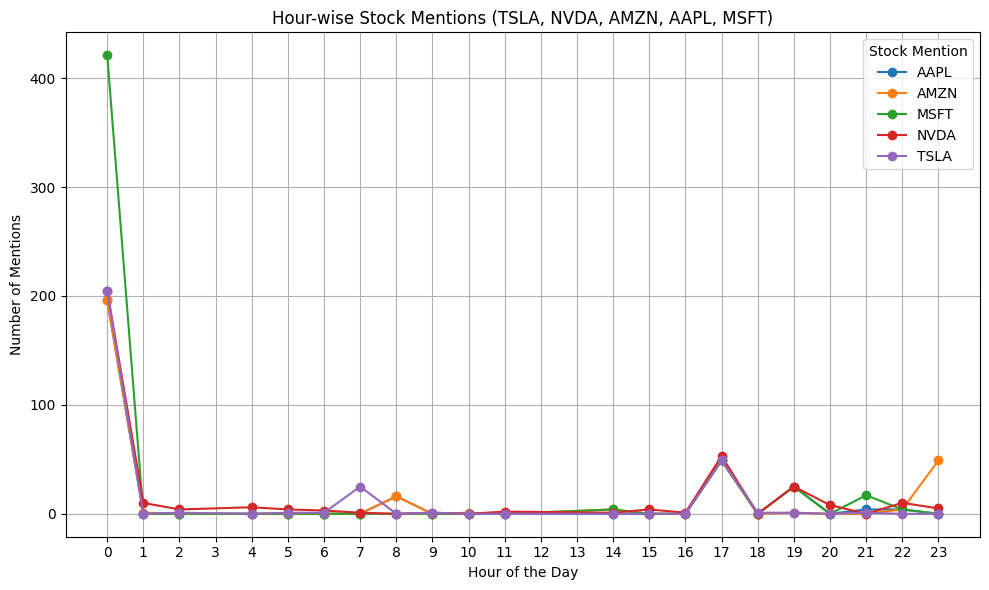

In [53]:
df_filtered['hour'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour
hour_wise_mentions = df_filtered.groupby(['hour', 'Stock_Mention']).size().unstack().fillna(0)
hour_wise_mentions.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Hour-wise Stock Mentions (TSLA, NVDA, AMZN, AAPL, MSFT)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Mentions')
plt.xticks(range(0, 24))
plt.legend(title='Stock Mention')
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritushreedey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in stop_words and word not in punctuation]
    return " ".join(cleaned_tokens)

df_filtered['cleaned_text'] = df_filtered['Text'].apply(clean_text)

/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1224/3455031176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cleaned_text'] = df_filtered['Text'].apply(clean_text)


In [65]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_filtered['cleaned_text'])
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
market recap week aapl stock amzn earnings watch cvna flipped
Topic 1:
great ai path msft bidu duot cdns fslr investors snps
Topic 2:
nvda tsla amzn earnings msft aapl magnificent trends preview googl
Topic 3:
calls guess tesla nvda amazon msft strategy tsla aapl amzn
Topic 4:
crm nrxp performance loadingzone snow pltr crwd panw usd months
Topic 5:
calls guess tesla nvda amazon msft strategy tsla aapl amzn
Topic 6:
earnings msft bear ai amzn tech carnage end selloff case
Topic 7:
amzn look stock street wall goog picks nflx managers lyft
Topic 8:
ai amd rally tech tsla meta th turin expected robotaxi
Topic 9:
nvda inflation future msft aapl meta cuts data sight rattles


## Correlation analysis between frequency of mentions and stock price movement for TSLA

In [216]:
tesla = df[df['Stock_Mention']=='TSLA']

In [217]:
tesla.head()

,Text,date,time,positive,negative,neutral,compound,Stock_Mention
11,oct 10 is the day of ai tsla robotaxi and amd ...,2024-10-05,07:12:47,0.0,0.0,1.0,0.0,TSLA
11,oct 10 is the day of ai tsla robotaxi and amd ...,2024-10-05,07:12:47,0.0,0.0,1.0,0.0,TSLA
11,oct 10 is the day of ai tsla robotaxi and amd ...,2024-10-05,07:12:47,0.0,0.0,1.0,0.0,TSLA
11,oct 10 is the day of ai tsla robotaxi and amd ...,2024-10-05,07:12:47,0.0,0.0,1.0,0.0,TSLA
11,oct 10 is the day of ai tsla robotaxi and amd ...,2024-10-05,07:12:47,0.0,0.0,1.0,0.0,TSLA


In [218]:
date_range = tesla['date']
start_date = date_range.min()
end_date = date_range.max()

print(f"Date range: {start_date} to {end_date}")

Date range: 2021-09-30 00:00:00 to 2024-10-05 00:00:00


In [219]:
tsla_stock_data = yf.download('TSLA', start='2021-09-30', end='2024-11-05', interval='1d')  # Adjust dates accordingly
tsla_stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [220]:
tsla_stock_data = tsla_stock_data[['Date', 'Close']]

In [221]:
len(tesla)

286

In [222]:
tsla_stock_data.head()

,Date,Close
0,2021-09-30,258.493347
1,2021-10-01,258.406677
2,2021-10-04,260.510010
3,2021-10-05,260.196655
4,2021-10-06,260.916656


In [223]:
tesla.rename(columns={'date': 'Date'}, inplace=True)

/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1224/1364769045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.rename(columns={'date': 'Date'}, inplace=True)


In [224]:
tesla['Date'] = pd.to_datetime(tesla['Date'])  
tsla_stock_data['Date'] = pd.to_datetime(tsla_stock_data['Date']) 
tesla = tesla.merge(tsla_stock_data[['Date', 'Close']], on='Date', how='inner')

/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1224/156761814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['Date'] = pd.to_datetime(tesla['Date'])
/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1224/156761814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_stock_data['Date'] = pd.to_datetime(tsla_stock_data['Date'])


In [225]:
tesla.head()

,Text,Date,time,positive,negative,neutral,compound,Stock_Mention,Close
0,98k yolo on tsla 1018 calls tesla is going to ...,2024-10-02,19:48:37,0.168,0.000,0.832,0.4278,TSLA,249.020004
1,who thinks tsla is going to miss earnings beca...,2024-09-24,06:07:13,0.000,0.118,0.882,-0.1531,TSLA,254.270004
2,dumping tsla at a loss and focus on another co...,2024-08-08,21:15:10,0.000,0.277,0.723,-0.5574,TSLA,198.839996
3,idvv 0008 usd loadingzone httpsmarketscreenerc...,2024-08-07,00:10:23,0.000,0.000,1.000,0.0000,TSLA,191.759995
4,idvv 0008 usd loadingzone httpsmarketscreenerc...,2024-08-07,00:10:23,0.000,0.000,1.000,0.0000,TSLA,191.759995


In [226]:
daily_mentions = tesla[tesla['Stock_Mention'] == 'TSLA'].groupby('Date').size().reset_index(name='Mentions')
print(daily_mentions.head())
tesla = tesla.merge(daily_mentions, on='Date', how='inner')

        Date  Mentions
0 2021-09-30         1
1 2023-10-19         1
2 2024-03-14         1
3 2024-03-15         9
4 2024-04-22        49


In [227]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['positive', 'negative', 'neutral', 'compound', 'Close','Mentions']
tesla[columns_to_normalize] = scaler.fit_transform(tesla[columns_to_normalize])
tesla.head()


,Text,Date,time,positive,negative,neutral,compound,Stock_Mention,Close,Mentions
0,98k yolo on tsla 1018 calls tesla is going to ...,2024-10-02,19:48:37,0.583333,0.000000,0.658537,0.674680,TSLA,0.918644,0.0
1,who thinks tsla is going to miss earnings beca...,2024-09-24,06:07:13,0.000000,0.342029,0.760163,0.293136,TSLA,0.963730,0.0
2,dumping tsla at a loss and focus on another co...,2024-08-08,21:15:10,0.000000,0.802899,0.436992,0.027586,TSLA,0.487705,0.0
3,idvv 0008 usd loadingzone httpsmarketscreenerc...,2024-08-07,00:10:23,0.000000,0.000000,1.000000,0.393695,TSLA,0.426903,1.0
4,idvv 0008 usd loadingzone httpsmarketscreenerc...,2024-08-07,00:10:23,0.000000,0.000000,1.000000,0.393695,TSLA,0.426903,1.0


In [228]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [229]:
daily_data = tesla.groupby('Date').agg({
    'Stock_Mention': 'sum',
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'compound': 'mean',
    'Close': 'mean'
}).reset_index()

In [230]:
tesla.head()

,Text,Date,time,positive,negative,neutral,compound,Stock_Mention,Close,Mentions
0,98k yolo on tsla 1018 calls tesla is going to ...,2024-10-02,19:48:37,0.583333,0.000000,0.658537,0.674680,TSLA,0.918644,0.0
1,who thinks tsla is going to miss earnings beca...,2024-09-24,06:07:13,0.000000,0.342029,0.760163,0.293136,TSLA,0.963730,0.0
2,dumping tsla at a loss and focus on another co...,2024-08-08,21:15:10,0.000000,0.802899,0.436992,0.027586,TSLA,0.487705,0.0
3,idvv 0008 usd loadingzone httpsmarketscreenerc...,2024-08-07,00:10:23,0.000000,0.000000,1.000000,0.393695,TSLA,0.426903,1.0
4,idvv 0008 usd loadingzone httpsmarketscreenerc...,2024-08-07,00:10:23,0.000000,0.000000,1.000000,0.393695,TSLA,0.426903,1.0


In [231]:
correlation_mentions_close = tesla['Mentions'].corr(tesla['Close'])
print(correlation_mentions_close)


0.7185296268852825


In [232]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
daily_sentiment = tesla.groupby('Date').agg({
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'compound': 'mean',
    'Close': 'mean'  
}).reset_index()

correlation_matrix = daily_sentiment[['positive', 'negative', 'neutral', 'compound', 'Close']].corr()

# Print the correlation matrix
print(correlation_matrix)

          positive  negative   neutral  compound     Close
positive  1.000000  0.003019 -0.645406  0.685616  0.335437
negative  0.003019  1.000000 -0.765785 -0.681570  0.298913
neutral  -0.645406 -0.765785  1.000000  0.079693 -0.444042
compound  0.685616 -0.681570  0.079693  1.000000  0.100193
Close     0.335437  0.298913 -0.444042  0.100193  1.000000


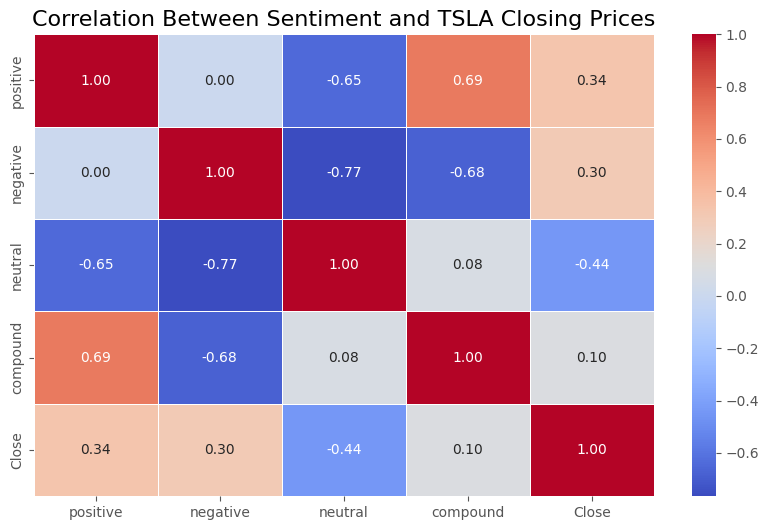

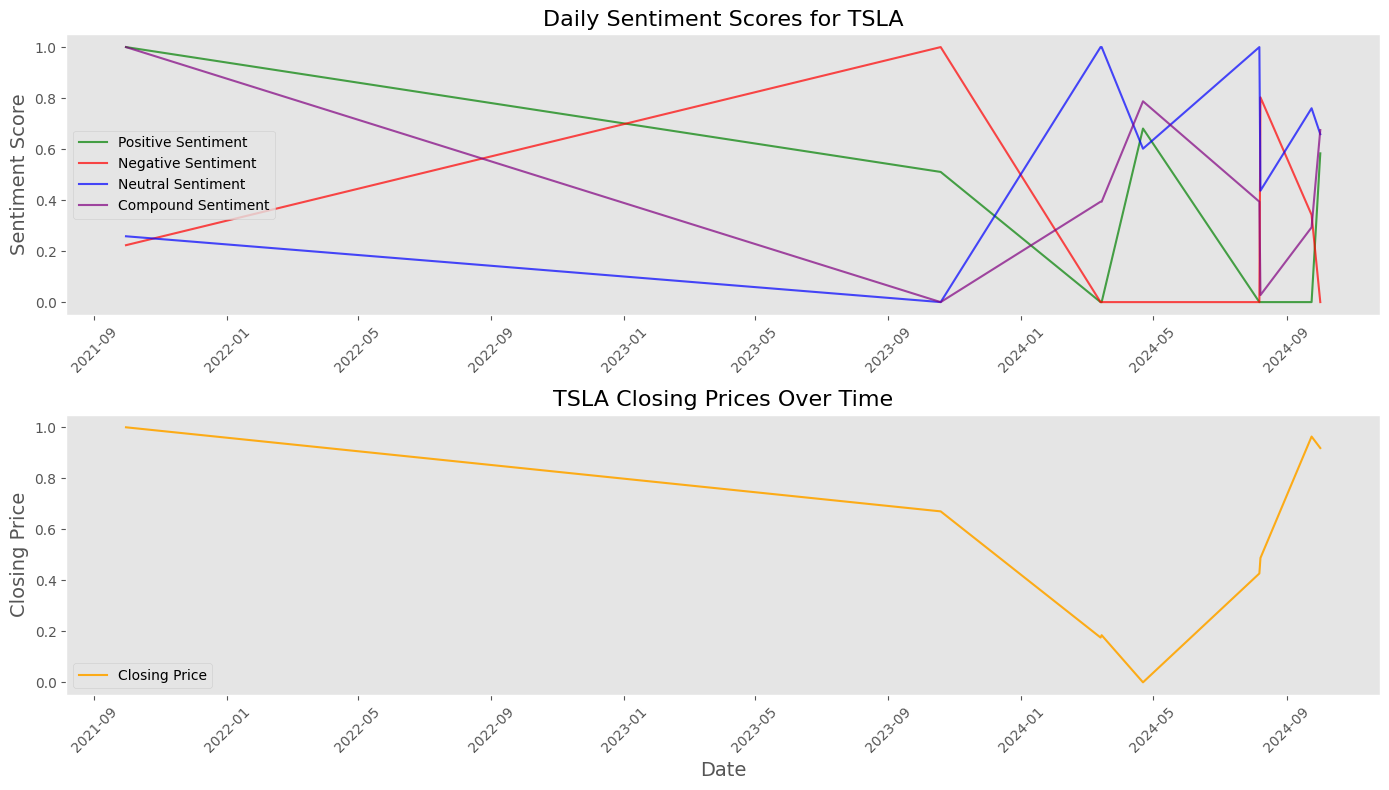

In [145]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Sentiment and TSLA Closing Prices', fontsize=16)
plt.show()
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)  
plt.plot(daily_sentiment['Date'], daily_sentiment['positive'], label='Positive Sentiment', color='green', alpha=0.7)
plt.plot(daily_sentiment['Date'], daily_sentiment['negative'], label='Negative Sentiment', color='red', alpha=0.7)
plt.plot(daily_sentiment['Date'], daily_sentiment['neutral'], label='Neutral Sentiment', color='blue', alpha=0.7)
plt.plot(daily_sentiment['Date'], daily_sentiment['compound'], label='Compound Sentiment', color='purple', alpha=0.7)
plt.title('Daily Sentiment Scores for TSLA', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()


plt.subplot(2, 1, 2)  
plt.plot(daily_sentiment['Date'], daily_sentiment['Close'], label='Closing Price', color='orange', alpha=0.9)
plt.title('TSLA Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Trends in stock sentiment or frequency of mentions over time

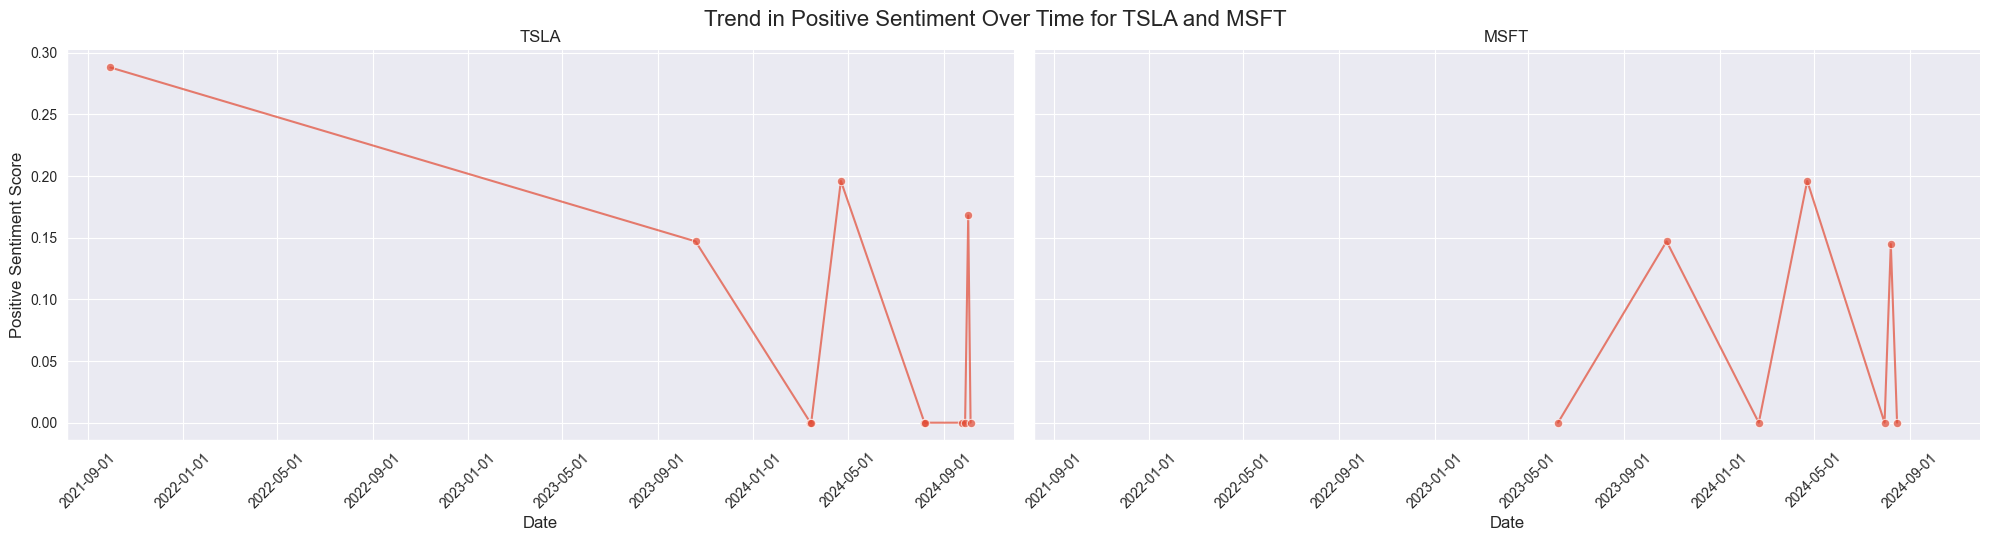

In [202]:
df['date'] = pd.to_datetime(df['date'])
daily_sentiment = df.groupby(['date', 'Stock_Mention']).agg({
    'positive': 'mean'
}).reset_index()

daily_sentiment = daily_sentiment[daily_sentiment['Stock_Mention'].isin(['TSLA', 'MSFT'])]
g = sns.FacetGrid(daily_sentiment, col='Stock_Mention', height=5, aspect=2)
g.map(sns.lineplot, 'date', 'positive', marker='o', alpha=0.7)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date", "Positive Sentiment Score")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trend in Positive Sentiment Over Time for TSLA and MSFT', fontsize=16)
plt.show()





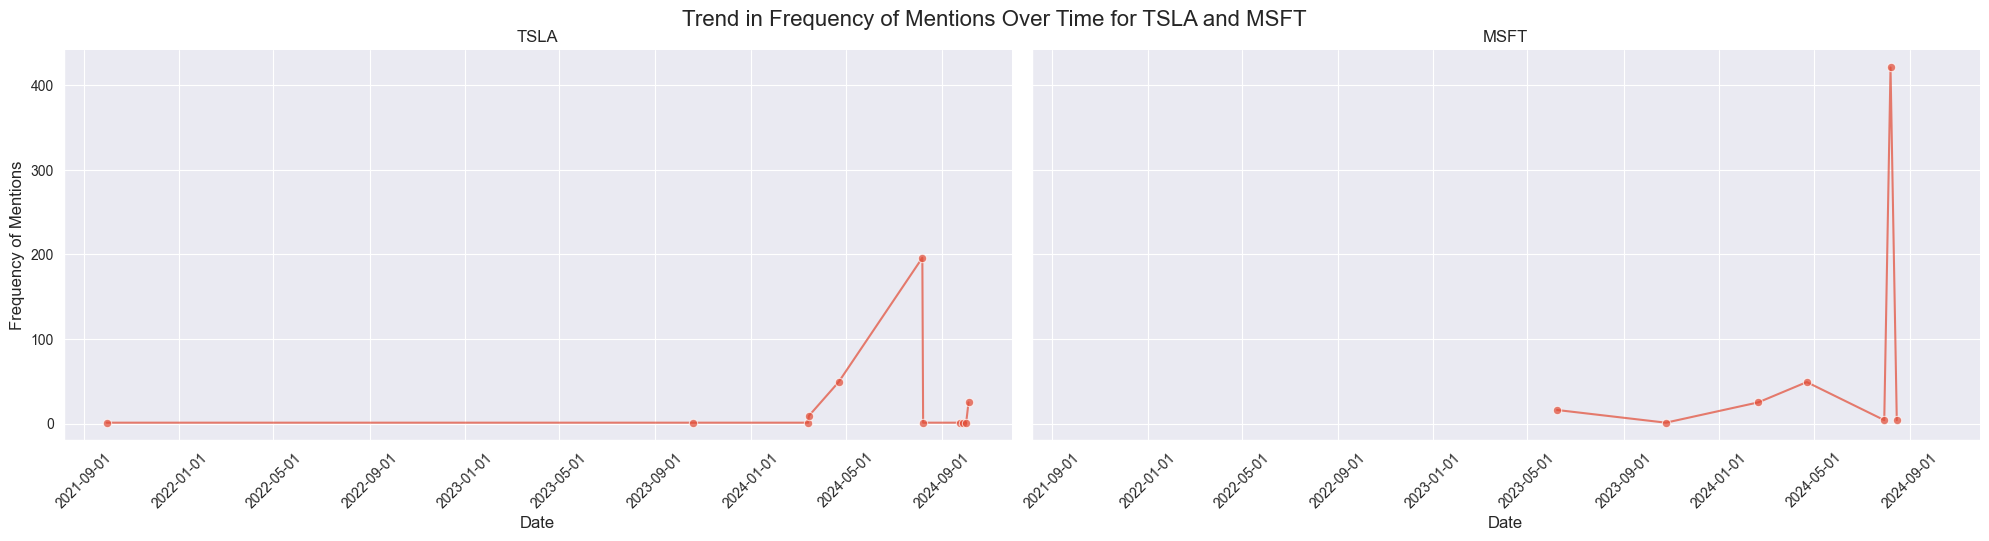

In [203]:
df['date'] = pd.to_datetime(df['date'])
mention_counts = df.groupby(['date', 'Stock_Mention']).size().reset_index(name='mention_count')
mention_counts = mention_counts[mention_counts['Stock_Mention'].isin(['TSLA', 'MSFT'])]
g = sns.FacetGrid(mention_counts, col='Stock_Mention', height=5, aspect=2)
g.map(sns.lineplot, 'date', 'mention_count', marker='o', alpha=0.7)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date", "Frequency of Mentions")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trend in Frequency of Mentions Over Time for TSLA and MSFT', fontsize=16)
plt.show()


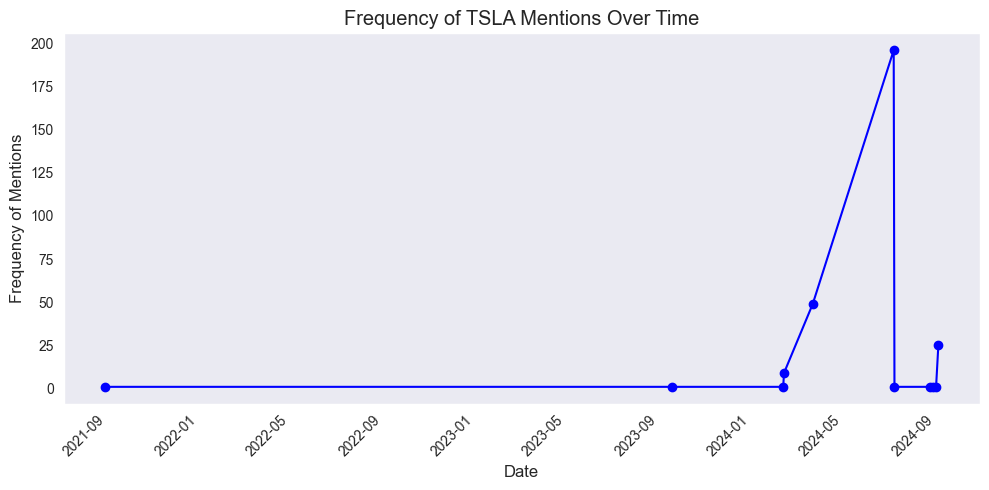

In [208]:
df['date'] = pd.to_datetime(df['date'])
tsla_mentions = df[df['Stock_Mention'] == 'TSLA']
tsla_frequency = tsla_mentions.groupby('date').size().reset_index(name='frequency')
plt.figure(figsize=(10, 5))
plt.plot(tsla_frequency['date'], tsla_frequency['frequency'], marker='o', linestyle='-', color='b')
plt.title('Frequency of TSLA Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency of Mentions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

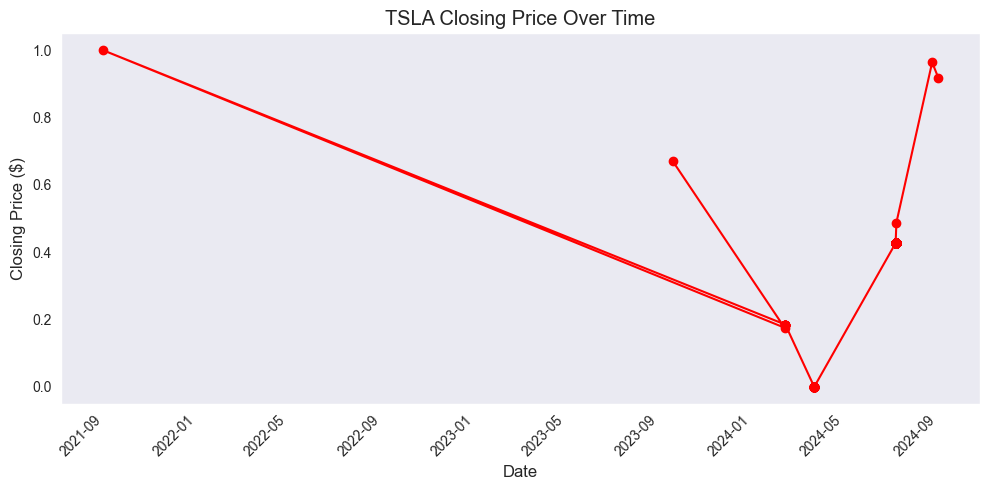

In [235]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
plt.figure(figsize=(10, 5))
plt.plot(tesla['Date'], tesla['Close'], marker='o', linestyle='-', color='r')
plt.title('TSLA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Report Findings:**

1. Sentiment Analysis:
   - Among the stocks analyzed (TSLA, NVDA, AMZN, AAPL, MSFT), MSFT showed the highest average positive sentiment (0.136) and compound sentiment score (0.420).
   - NVDA had the highest average negative sentiment (0.035), though still relatively low.
   - All stocks generally had high neutral sentiment scores, indicating mostly neutral discussions.

2. Mention Frequency:
   - TSLA (Tesla) had significantly more mentions compared to other stocks, indicating high social media interest.
   - There was a noticeable spike in mentions for all stocks around October 10, 2024, which could be related to a significant event or news.

3. Correlation Analysis (TSLA):
   - There's a strong positive correlation (0.719) between the frequency of TSLA mentions and its closing price, suggesting that increased social media discussion might be associated with price increases.
   - Positive sentiment showed a moderate positive correlation (0.335) with TSLA's closing price.
   - Negative sentiment had a weak positive correlation (0.299) with the closing price, which is counterintuitive and might need further investigation.
   - Neutral sentiment showed a moderate negative correlation (-0.444) with the closing price.

4. Sentiment Trends:
   - TSLA's sentiment scores showed significant volatility over time, with notable spikes in both positive and negative sentiment.
   - MSFT's sentiment appeared more stable, with generally higher positive sentiment compared to TSLA.

5. Price Movements:
   - TSLA's stock price showed considerable volatility, with a general upward trend over the analyzed period.

**Insights and Possible Buy/Sell Signals:**

1. TSLA (Tesla):
   - The strong correlation between mention frequency and price suggests that monitoring social media activity could provide valuable trading signals for TSLA.
   - Spikes in positive sentiment, especially when combined with increased mention frequency, might indicate potential buy signals.
   - However, the counterintuitive correlation between negative sentiment and price suggests caution in interpreting sentiment alone as a trading signal.

2. MSFT (Microsoft):
   - The consistently high positive sentiment for MSFT could indicate a generally favorable market perception, potentially signaling a stable long-term investment.
   - Significant deviations from this typically stable sentiment might warrant attention as potential trading signals.

3. General:
   - The spike in mentions around October 10, 2024, for all analyzed stocks suggests a significant event. Traders should be alert to such periods of increased social media activity as they might precede or coincide with price movements.

**Recommendations:**

1. Develop a real-time monitoring system for social media mentions and sentiment, particularly for highly discussed stocks like TSLA. This could provide early signals for potential price movements.

2. Implement a trading strategy that combines sentiment analysis with traditional technical and fundamental analysis. The sentiment data could be used as an additional factor in decision-making rather than a standalone signal.

3. For TSLA specifically, create alerts for unusual spikes in mention frequency, as these seem to correlate strongly with price movements.

4. Conduct further investigation into the relationship between negative sentiment and price for TSLA. The weak positive correlation is unexpected and might reveal more complex market dynamics.

5. Consider MSFT as a potential stable investment based on its consistently positive sentiment, but continue monitoring for any significant changes in sentiment patterns.

**Future Improvements:**

1. Integrate data from multiple sources, including financial news, earnings reports, and analyst ratings, to provide a more comprehensive view of market sentiment.

2. Implement more advanced natural language processing techniques to improve sentiment analysis accuracy, possibly including aspect-based sentiment analysis to understand sentiment towards specific company aspects (e.g., product launches, management decisions).

3. Extend the analysis to a broader range of stocks and longer time periods to identify more robust patterns and relationships.

4. Incorporate machine learning models to predict price movements based on sentiment and other factors, potentially using techniques like LSTM networks for time series forecasting.

5. Develop a user-friendly dashboard for traders to easily monitor real-time sentiment and receive alerts for potential trading signals.

6. Conduct a more granular analysis of the relationship between sentiment, mention frequency, and intraday price movements to identify short-term trading opportunities.

By implementing these recommendations and improvements, traders and investors could gain valuable insights from social media sentiment to inform their decision-making processes in the stock market.